In [3]:
import pandas as pd
import numpy as np

train_data = pd.read_csv('../data/full_size/atec_anti_fraud_train.csv',index_col = 0)
testa_data = pd.read_csv('../data/full_size/atec_anti_fraud_test_a.csv',index_col = 0)

In [4]:
train_num = int(0.8*train_data.shape[0])
test_data = train_data.iloc[train_num:,:]
train_data = train_data.iloc[:train_num,:]
train_x = train_data.iloc[:,1:]
train_y = train_data.iloc[:,0]
test_x = test_data.iloc[:,1:]
test_y = test_data.iloc[:,0]

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
random_clf = RandomForestClassifier(max_depth=9, random_state=0)
extra_clf = ExtraTreesClassifier(n_estimators=300)
deci_clf = DecisionTreeClassifier(max_depth=10)
xgb_clf = XGBClassifier(verbose=True)

In [6]:
xgb_clf.fit(train_x,train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [30]:
feature_scores = pd.Series(xgb_clf.feature_importances_,index=train_x.columns)
feature_scores.to_csv('xgb_feature_scores.csv')

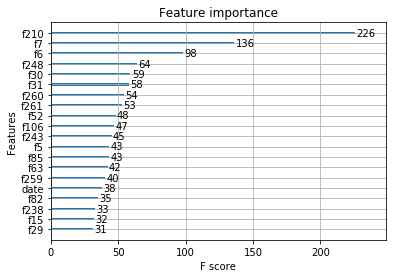

In [15]:
from xgboost import plot_importance
plot_importance(xgb_clf,max_num_features=20)